In [ ]:
# Rosa Lee
# INF2178: Assignment 4

# Importing the necessary files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.graphics.factorplots import interaction_plot  # Import the interaction_plot submodule
import statsmodels.stats.diagnostic as diag

Mounted at /drive
   Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
0           0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
1           1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
2           2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   
3           3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   
4           5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F   

  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0    R   87    14  2.0  27.0  0.0  1987  0.696  0.883  
1    R   88    14  2.0  30.0  0.0  2004  0.681  0.876  
2    R   75    12  NaN  23.0  0.5  1678  0.736  1.046  
3    R   76    12  NaN  28.0  0.5  1738  0.713  1.010  
4    R   88    18  3.0  28.0  0.0  1215  0.710  1.444  
       Unnamed: 0       Visit     MR Delay         Age        EDUC  \
count  294.000000  294.000000   294.000000  294.000000  294.000000   
mean   190.421769    1.489796   349.785714 

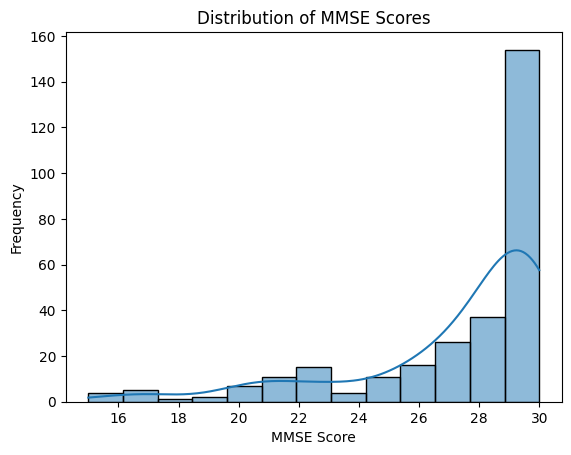

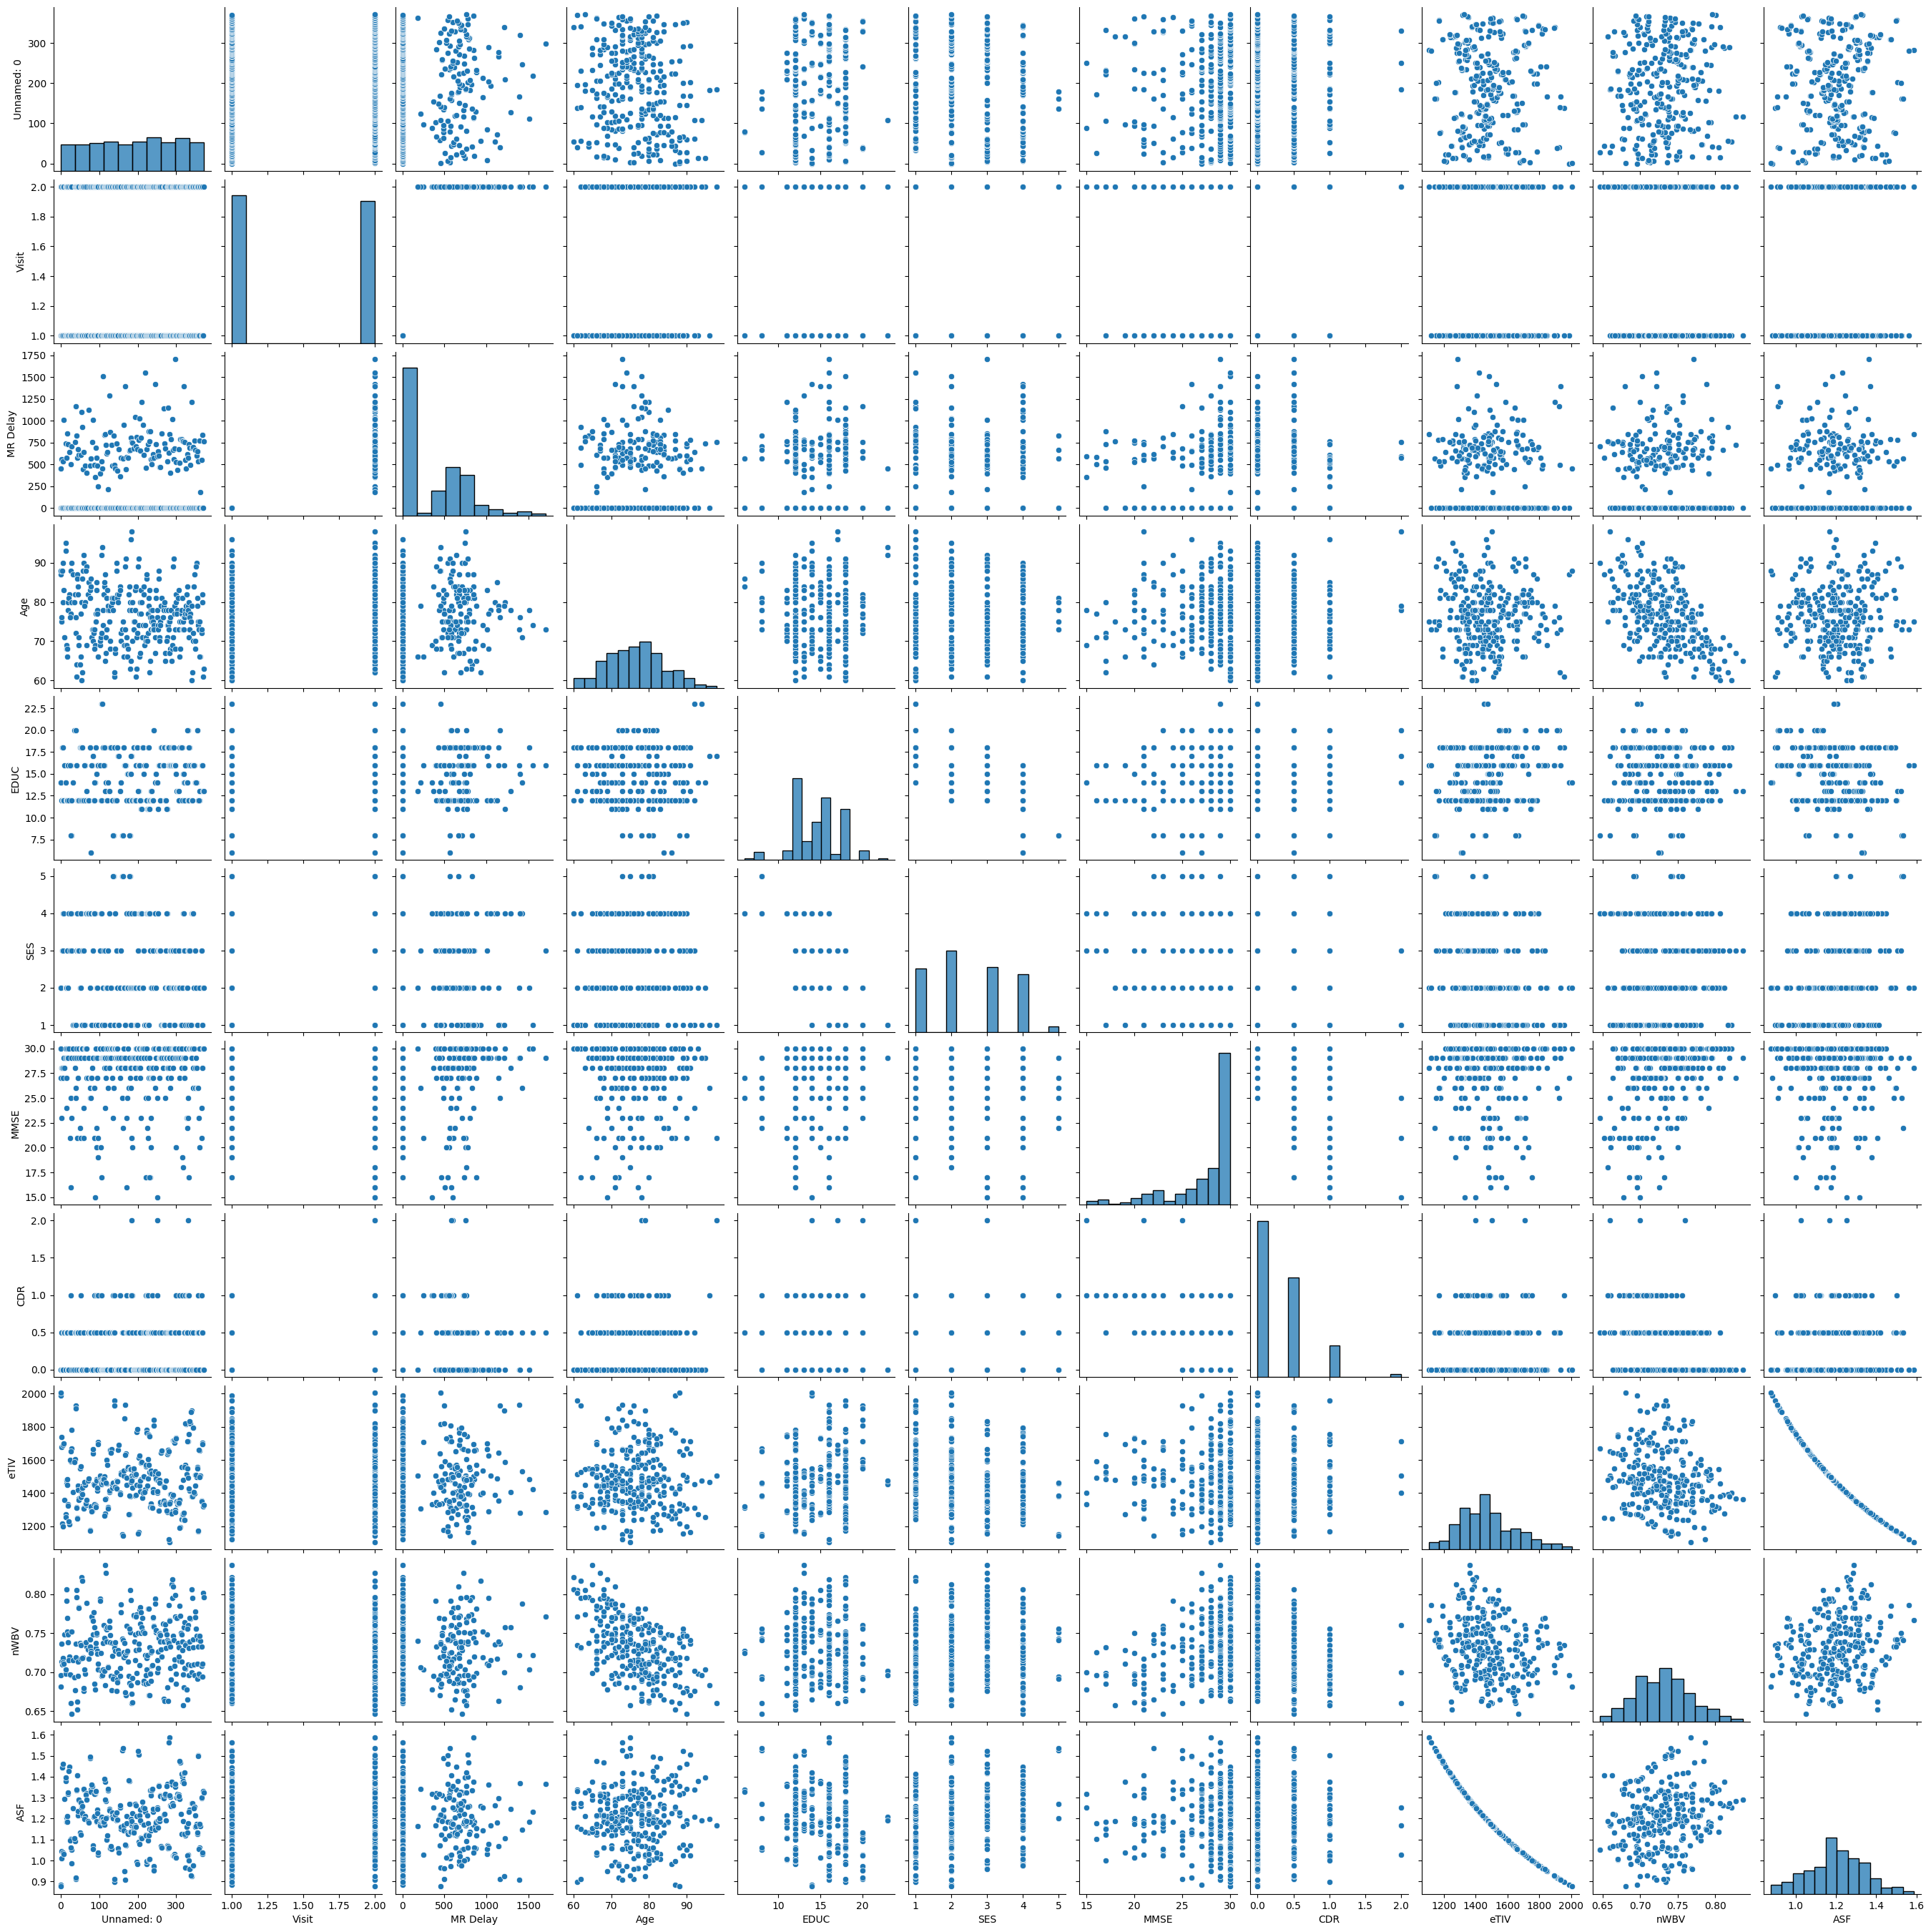

In [ ]:
# Importing data frame from Google Drive
from google.colab import drive
drive.mount("/drive", force_remount=True)

# Importing data into variable data
df = pd.read_csv('/drive/MyDrive/INF2178_A4_data.csv')

#EDA
# Display the first few rows of the dataset
print(df.head())

# Perform exploratory data analysis
print(df.describe())
sns.histplot(df['MMSE'], kde=True)
plt.title('Distribution of MMSE Scores')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.show()

# Plotting some exploratory graphs
sns.pairplot(df)
plt.show()

                        sum_sq     df          F        PR(>F)
C(Visit)             28.180865    1.0   3.982232  4.692762e-02
C(Group)           1322.986378    2.0  93.475467  5.474086e-32
C(Visit):C(Group)    20.527441    2.0   1.450364  2.361982e-01
Residual           2030.998628  287.0        NaN           NaN


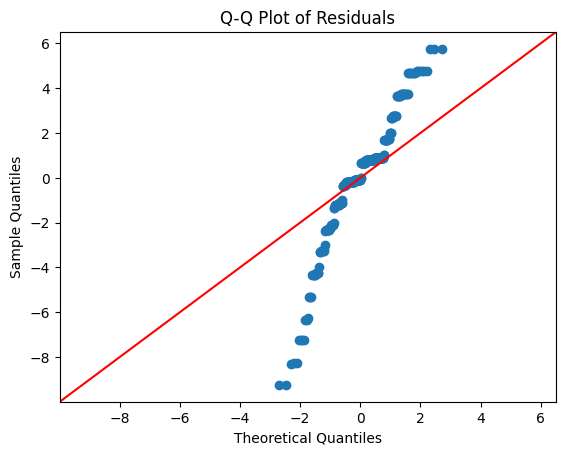

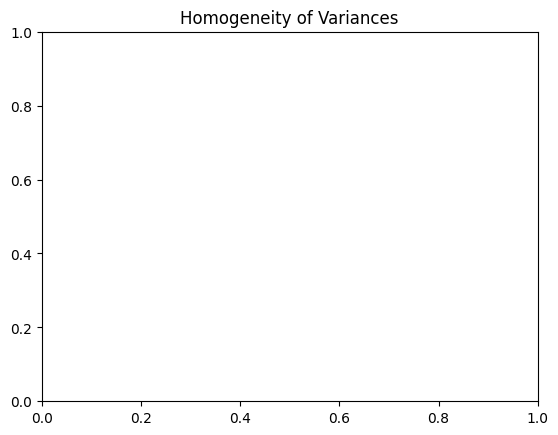

In [ ]:
#ANOVA
# Perform mixed-effects ANOVA
model = ols('MMSE ~ C(Visit) * C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Test assumptions for mixed-effects ANOVA
# Assumption 1: Normality of residuals
sm.qqplot(model.resid, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

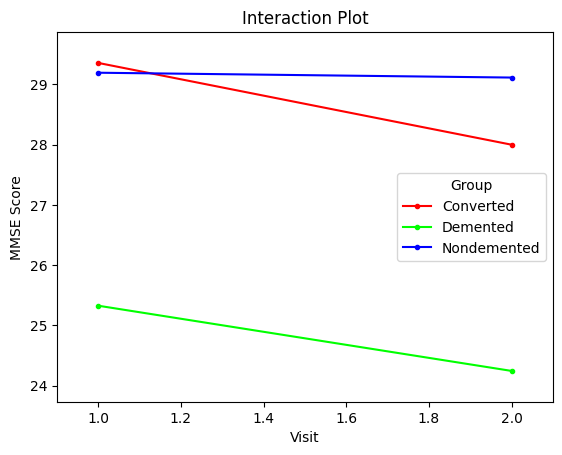

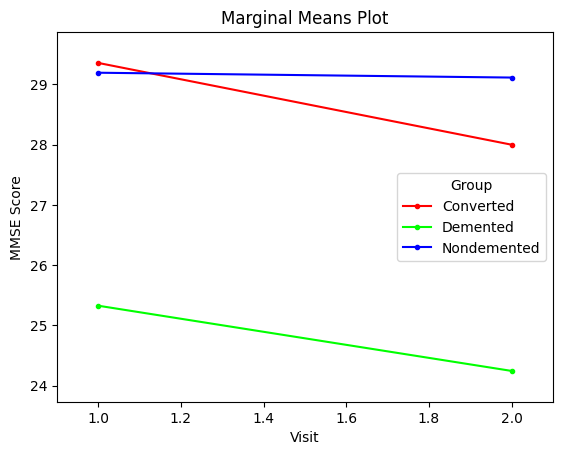

In [ ]:
# Create output plots
# Interaction plot
interaction_plot(df['Visit'], df['Group'], df['MMSE'])
plt.title('Interaction Plot')
plt.xlabel('Visit')
plt.ylabel('MMSE Score')
plt.show()

# Marginal means plot
interaction_plot(df['Visit'], df['Group'], df['MMSE'])
plt.title('Marginal Means Plot')
plt.xlabel('Visit')
plt.ylabel('MMSE Score')
plt.show()

In [ ]:
# Define parameters for power analysis
alpha = 0.05
effect_size = 0.7
power = 0.91
groups = df['Group'].unique()
nobs = len(df)

# Calculate total sample size for each group
ftest_anova_power = FTestAnovaPower()
sample_sizes = []
for group in groups:
    sample_size = ftest_anova_power.solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=power, k_groups=None)
    sample_sizes.append(sample_size)

# Calculate total sample size
total_sample_size = int(sum(sample_sizes))
print("Required Total Sample Size:", total_sample_size)

Required Total Sample Size: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/power.py:479: ValueWarning: Warning: using default start_value for k_groups
  warnings.warn('Warning: using default start_value for {0}'.format(key), ValueWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/power.py:479: ValueWarning: Warning: using default start_value for k_groups
  warnings.warn('Warning: using default start_value for {0}'.format(key), ValueWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/power.py:479: ValueWarning: Warning: using default start_value for k_groups
  warnings.warn('Warning: using default start_value for {0}'